<h1 style="text-align:center;">Gaussian Mixture Model</h1>

Berdasarkan: Bab 5 dari

VanderPlas. Python Data Science Handbook. O'Reilly (2017).

# Standard imports

In [1]:
import numpy as np

In [2]:
import matplotlib

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns; sns.set()

In [5]:
import IPython

In [6]:
IPython.display.set_matplotlib_formats("svg")

In [7]:
from sklearn.cluster import KMeans

In [9]:
from scipy.spatial.distance import cdist

In [8]:
from sklearn.mixture import GaussianMixture

# Kelemahan k-means

Buat data sintetik:

In [10]:
from sklearn.datasets.samples_generator import make_blobs

In [25]:
# Generate some data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

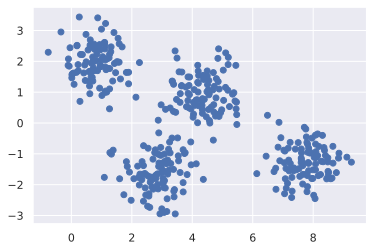

In [31]:
plt.plot(X[:,0], X[:,1], linewidth=0, marker="o")

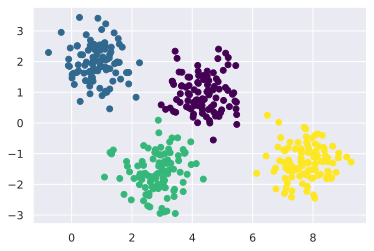

In [45]:
plt.scatter(X[:,0], X[:,1], c=y_true, cmap="viridis")

(-3, 4)

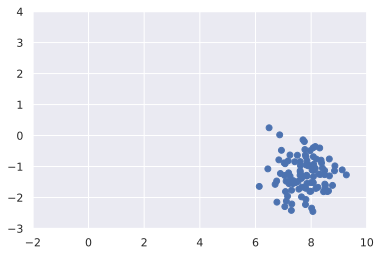

In [42]:
idx_cluster = y_true == 3;
plt.scatter( X[idx_cluster,0], X[idx_cluster,1] )
plt.xlim(-2,10)
plt.ylim(-3,4)

## Gunakan k-means

Gunakan k-means untuk membuat klastering. Buat plot dengan menggunakan scatter plot, dengan warna berdasarkan nilai `labels`.

kmeans = KMeans(4, random_state=0)
kmeans.fit(X) # proses fit
labels = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap="viridis");

In [47]:
kmeans.cluster_centers_

array([[ 2.84849883, -1.61366997],
       [ 7.75608144, -1.2689694 ],
       [ 0.83945671,  1.95662677],
       [ 4.36874542,  0.95041055]])

Fungsi khusus untuk membuat plot hasil dari klastering dengan k-means

In [48]:
mylst = ["a", "b", 1, 2, 4]

In [ ]:
for i in mylst:
    print(i)

In [50]:
for i in range(len(mylst)):
    print(mylst[i])

a
b
1
2
4


In [64]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    # plot the input data
    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap="viridis", zorder=2)
    # plot the representation of the k-means model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        # zorder=1 (lingkaran di belakang point scatter)

In [60]:
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
for center in centers:
    radii = cdist(X[labels == 1], [center])
type(radii)

numpy.ndarray

In [61]:
radii.max()

5.37508825264772

In [52]:
kmeans = KMeans(n_clusters=4, random_state=0)

radius =  1.7645762456722964
radius =  1.9785897125671263
radius =  1.7134296609376747
radius =  1.6747528201119646


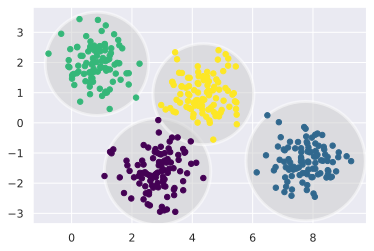

In [66]:
plot_kmeans(kmeans, X)

Transformasi data dengan matrik transformasi random normal (2x2) dan lakukan klastering pada data yang telah ditransformasi ini.

radius =  1.908112614298685
radius =  2.0987043280918076
radius =  2.1483216221307577
radius =  2.233118322036123


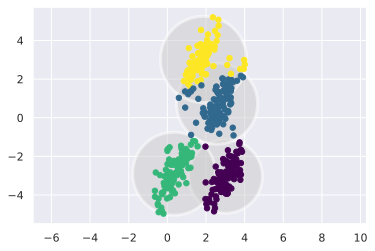

In [71]:
rng = np.random.RandomState(42)
X_stretched = np.dot(X, rng.randn(2, 2))
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

k-means kesulitan untuk membedakan klaster non sirkular.

Alternatif: menggunakan kernelized k-means.

# Gaussian mixture model (GMM)

Distribusi Gaussian (normal):

$$
p(x) = N \exp\left( \frac{-(x - \mu)^2}{2\sigma^2} \right) 
$$

$$
p(x) = w_{1} N \exp\left( \frac{-(x - \mu_{1})^2}{2\sigma_{1}^2} \right) +
w_{2} N \exp\left( \frac{-(x - \mu_{2})^2}{2\sigma_{2}^2} \right) 
$$

2d and higher

$$
p(\mathbf{x}) = \exp\left[ (\mathbf{x} - \boldsymbol{\mu})^\mathrm{T}
\Sigma
(\mathbf{x} - \boldsymbol{\mu}) \right]
$$

(1x3) (3x3) (3x1)

Expectation-maximization (EM) algorithm

GMM dapat dianggap sebagai generalisasi dari k-means.

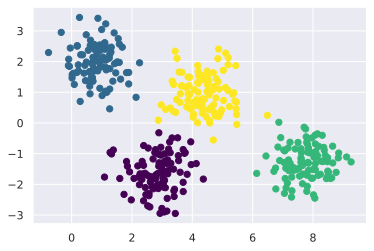

In [72]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis");

In [73]:
gmm.covariances_

array([[[ 0.38465995,  0.02716798],
        [ 0.02716798,  0.37394003]],

       [[ 0.29768676, -0.02444193],
        [-0.02444193,  0.34173529]],

       [[ 0.36530305,  0.01293533],
        [ 0.01293533,  0.28921965]],

       [[ 0.40398685, -0.00235346],
        [-0.00235346,  0.36933794]]])

In [74]:
gmm.means_

array([[ 2.84407337, -1.62828783],
       [ 0.83760086,  1.9579654 ],
       [ 7.76222624, -1.27635633],
       [ 4.36221851,  0.93141671]])

GMM adalah model yang berdasarkan pada probabilitas. Kita dapat memperoleh probabilitas dari setiap titik data untuk berada pada label atau kelas tertentu.

In [75]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.463 0.537]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


In [76]:
labels[:5]

array([3, 0, 0, 3, 0])

Plot dengan ukuran titik yang sesuai dengan probabilitas.

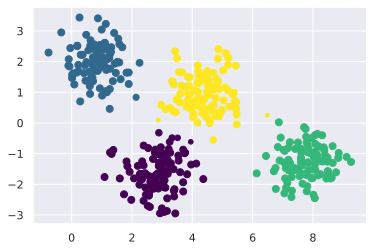

In [83]:
circle_size = 50 * probs.max(1) ** 2 # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=circle_size);

Maximum prob along 2nd axis:

In [ ]:
probs.max(1)[:5]

In [102]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    # using SVD to diagonalize the covariance
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

(-5.880397110956716, 5.880397110956716, -4.666904755831214, 4.666904755831214)

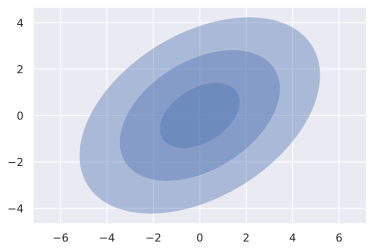

In [103]:
#cov = np.array([[2,0],[0,2]])
#cov = np.random.randn(2,2)
cov = np.array([[3,1],[1,2]])
plt.clf()
draw_ellipse([0,0], cov, alpha=0.4)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.axis("equal")

Fungsi untuk visualisasi hasil GMM.

In [92]:
gmm.weights_

array([0.24702726, 0.24963804, 0.24878736, 0.25454734])

In [93]:
np.sum(gmm.weights_)

1.0

In [104]:
def plot_gmm(gmm, X, label=True, ax=None):
    
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap="viridis", zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    ax.axis("equal")
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

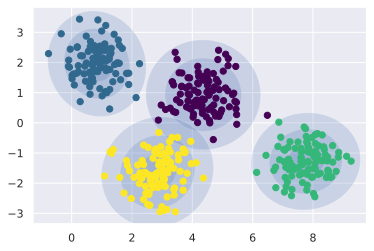

In [105]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

Gunakan GMM untuk data yang sudah ditransformasi.

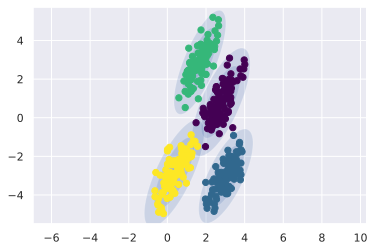

In [106]:
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

# GMM untuk estimasi densitas

Meskipun GMM dapat digunakan untuk klastering data, secara fundamental GMM adalah algoritma untuk estimasi densitas.

Contoh data non-sirkular:

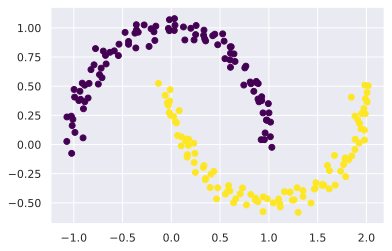

In [107]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=ymoon, cmap="viridis");

Gunakan GMM untuk klastering data ini.

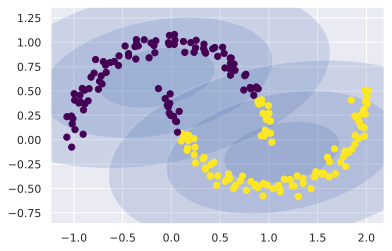

In [108]:
gmm2 = GaussianMixture(n_components=2, covariance_type="full", random_state=0)
plot_gmm(gmm2, Xmoon)

Hasil dari klastering GMM dengan `n_components=2` tidak terlalu baik.

Kita dapat menggunakan lebih banyak komponen, misalnya 16 komponen.

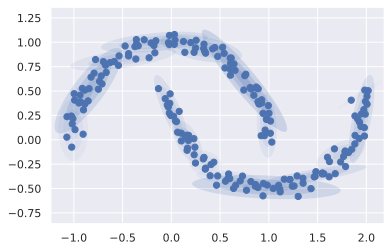

In [109]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

Pada kasus ini GMM digunakan tidak untuk menentukan klaster data yang berbeda namun untuk memodelkan distribusi dari input data. Distribusi ini adalah model generatif, artinya GMM dapat digunakan untuk menghasilkan data acak yang terdistribusi sama dengan data input.

Berikut ini kita memproduksi data baru dari distribusi ini.

In [110]:
Xnew = gmm16.sample( n_samples=400 )[0]

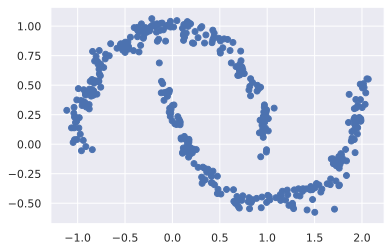

In [111]:
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

# Memilih jumlah komponen Gaussian

Kita dapat menggunakan Akaike information criterion (AIC) dan Bayesian information criterion (BIC) untuk menentukan jumlah komponen mixture yang digunakan.

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type="full", random_state=0).fit(Xmoon) for n in n_components]
plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components");
plt.grid(True)

Berdasarkan AIC: sekitar 10 komponen.

# Generate new data: digits dataset

In [112]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [113]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

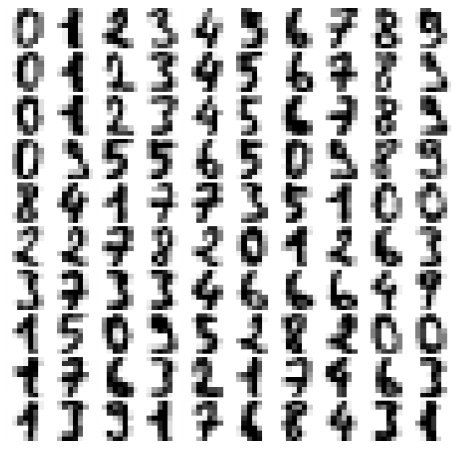

In [114]:
plot_digits(digits.data)

## Gunakan PCA untuk mengurangi jumlah fitur

In [115]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

Jumlah fitur berkurang dari 64 ke 41.

Gunakan AIC untuk menentukan jumlah komponen Gaussian.

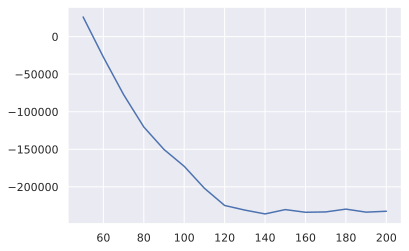

In [116]:
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type="full", random_state=0) for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

Kita akan menggunakan sekitar 120 komponen.

In [117]:
gmm = GaussianMixture(120, covariance_type="full", random_state=0)
gmm.fit(data)
print(gmm.converged_) # cek apakah algoritma sudah konvergen

True


Sampel data baru dari distribusi ini.

In [118]:
data_new = gmm.sample(100)[0]
data_new.shape

(100, 41)

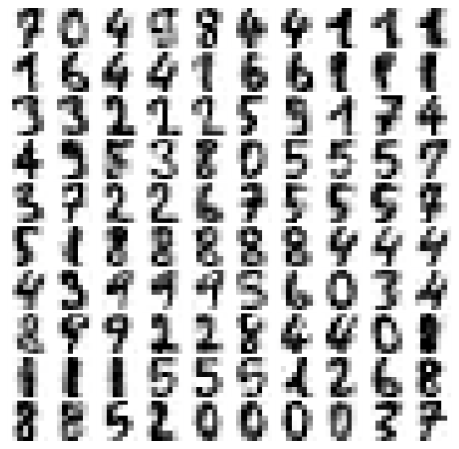

In [119]:
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

# Teori

# Dokumentasi

In [ ]:
help(plt.scatter)

In [ ]:
help(cdist)

In [ ]:
help(KMeans)